In [19]:
# References: https://starchild.gsfc.nasa.gov/docs/StarChild/questions/redshift.html
# https://www.atnf.csiro.au/outreach/education/senior/cosmicengine/hubble.html
# https://www.pnas.org/content/112/11/3173
# https://www.pnas.org/content/101/1/8


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("hubble_data.csv")
df.head()

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


In [38]:
headers = ["dist","rec_vel"]

df = pd.read_csv("hubble_data_no_headers.csv", names = headers)

df

,dist,rec_vel
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185
5,0.275,-220
6,0.450,200
7,0.500,290
8,0.500,270
9,0.630,200


In [5]:
df["dist"]

0     0.032
1     0.034
2     0.214
3     0.263
4     0.275
5     0.275
6     0.450
7     0.500
8     0.500
9     0.630
10    0.800
11    0.900
12    0.900
13    0.900
14    0.900
15    1.000
16    1.100
17    1.100
18    1.400
19    1.700
20    2.000
21    2.000
22    2.000
23    2.000
Name: dist, dtype: float64

In [13]:
df.head()

,dist,rec_vel
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


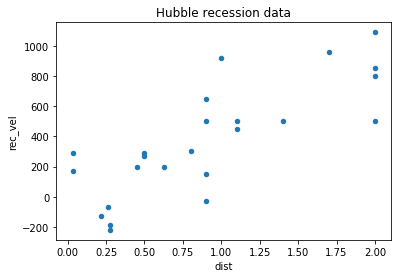

In [35]:
df.plot.scatter(x = 'dist', y = 'rec_vel', title = 'Hubble recession data')
plt.show()

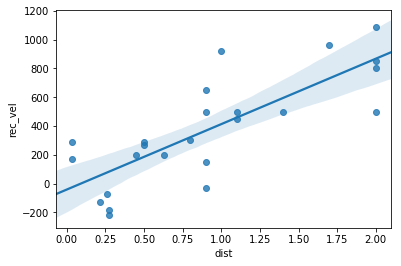

In [37]:
sns.regplot('dist', 'rec_vel', data=df)

In [29]:
import statsmodels.formula.api as sm
result = sm.ols(formula="rec_vel ~ dist", data=df).fit()
print(result.params)


Intercept    -40.783649
dist         454.158441
dtype: float64


In [33]:
# H = 454 is the Hubble constant, measured in km/sec/megaparsec 
#
# Thus 
#
#.     v = H x d ... possibly + constant
#
# Current value of H: about 65 km/sec/mp
# 1 mpc = 3x10^19 km, so H has units of 1/sec
# Therefore 1/H has the units of time, in seconds, and we
# find that 1/H ~ 6.6x10^16 sec - 2 billion years.
# This is an extimate of the age of universe (!!)

# Adjusting for the 7-fold reduction in the value of H, we find that
# age of universe is about 7 times greater, i.e., 14 billion years.


def v(d):
    return 454.16*d - 40.78
v(0.5), v(1.4)

(186.3, 595.044)

In [31]:
df

,dist,rec_vel
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185
5,0.275,-220
6,0.450,200
7,0.500,290
8,0.500,270
9,0.630,200


In [34]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                rec_vel   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     36.44
Date:                Wed, 15 May 2019   Prob (F-statistic):           4.48e-06
Time:                        21:11:58   Log-Likelihood:                -163.83
No. Observations:                  24   AIC:                             331.7
Df Residuals:                      22   BIC:                             334.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.7836     83.439     -0.489      0.6